Pendulum 1 string length :  0.21m
Pendulum 1 period :  0.93s
Pendulum 2 string length :  0.28m
Pendulum 2 period :  1.06s
Pendulum 3 string length :  0.40m
Pendulum 3 period :  1.27s
Longest pendulum is pendulum 3, length: 0.4015m


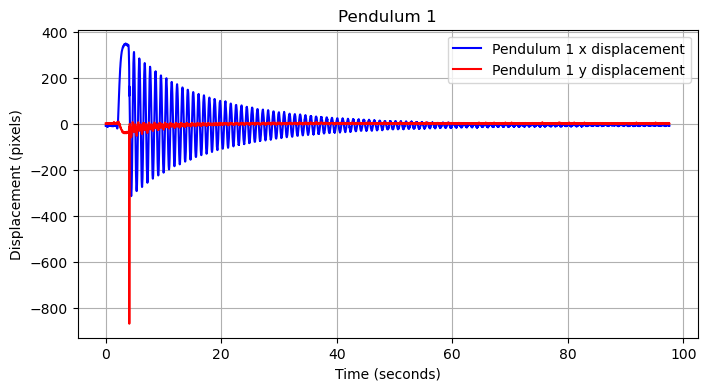

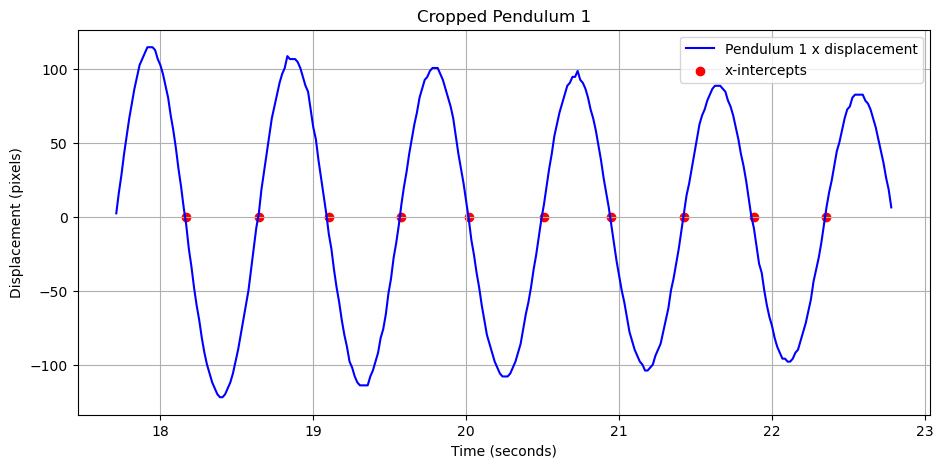

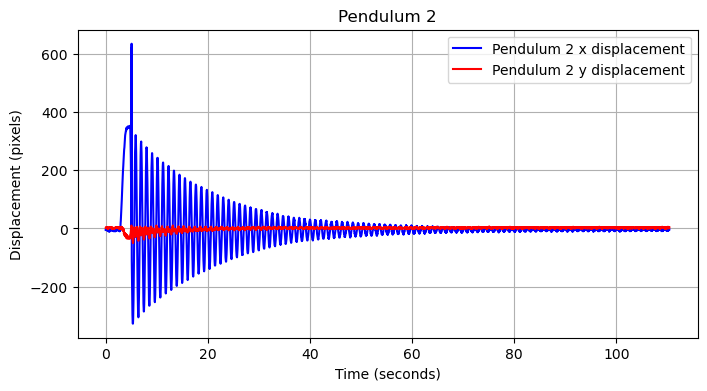

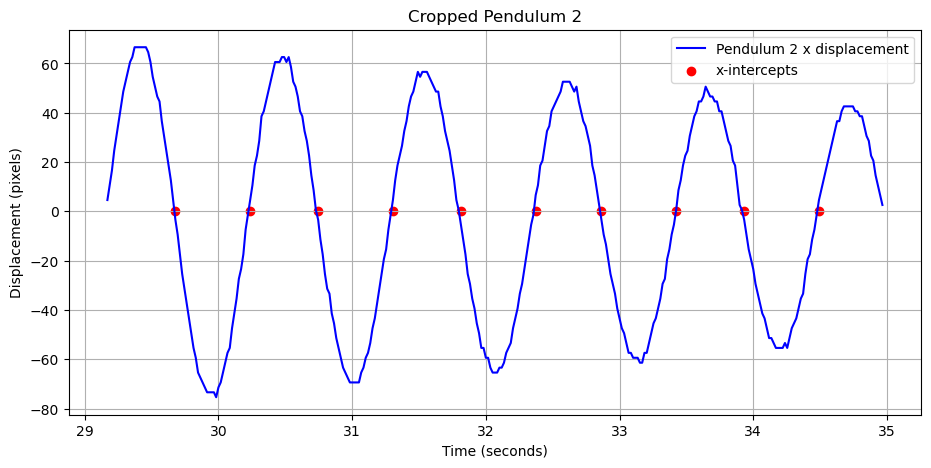

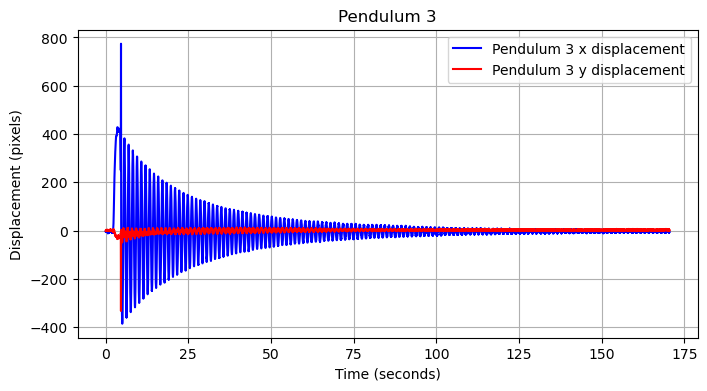

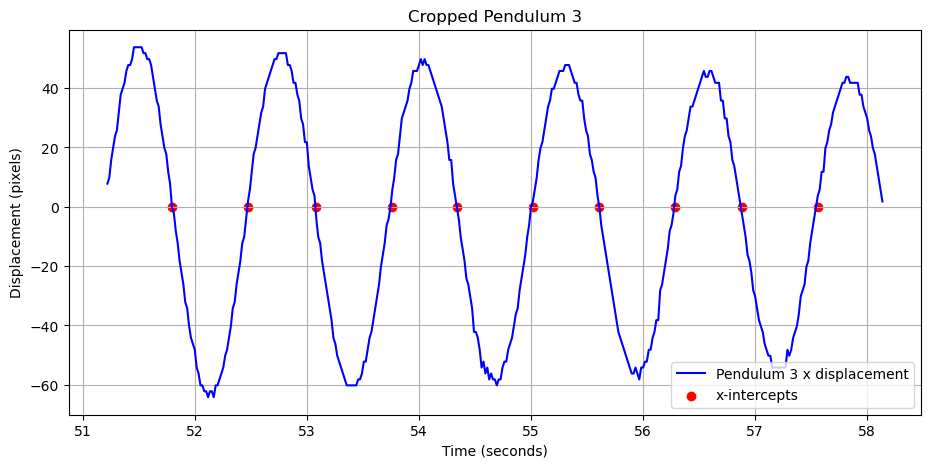

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

file_number = 3
pendulumdata = []
for x in range(file_number):
    pendulumfile = pd.read_csv(f'pendulum_{x + 1}.csv')
    pendulumdata.append(np.array(pendulumfile).T)
# To start analysing the given data, I had to first read the csv files with pandas. This was done for all three files with a for loop.
# The read files were turned into arrays with numpy, and were transposed (.T) so that all the data can be grouped by x and y positions, and accessed with indexes 0 and 1. 
# The displacement arrays were then stored in a list (pendulumdata) so they can later be looped over to find the longest pendulum. 
# My methodology for this project was to create functions for each part needed, and use them as puzzle pieces to process and analyse the data as needed. 
# This helps explain the steps I took, increased clarity and made it so that changes in the code require less edits in other parts to get things working again.
# Once I created all the functions and made them work, I moved them around so that they are ordered chronologically by which gets used first. 

def mean(arr):
    meanvalue = sum(arr) / len(arr) 
    return meanvalue
# To center the data, I first needed a way to find the center mark for the occilations of the pendulums. 
# The function I created calculated the mean position from the array, this would be used to to subtract each datum from and create a centered graph. 

def offsets(data): 
    xoffset = []    
    yoffset = []
    for x in data[0]:
        offset = x - mean(data[0])
        xoffset.append(offset)
    for y in data[1]:
        offset = y - mean(data[1])
        yoffset.append(offset)
    return xoffset, yoffset  # I searched how to use more than one output in functions, it can be accessed by writing the index after the function. https://labex.io/tutorials/python-how-to-return-values-from-functions-in-python-415177
# The next step to centering the data so that it is not just x and y positions, I created a function that does this. It starts off by creating two lists for the corresponding centered data in the x and y. 
# For each datum in x, the function would subtract the mean of all the x positions and add the result to the xoffset list. 
#The same process is done to the y data. The function then returns the new centered list of x and y positions.

def timeaxis(offsetdata): 
    time = []             
    for x in range(len(offsetdata)): 
        frame = x / 59
        time.append(frame)
    return time
# To plot the centered results of the x and y positions, I needed to make the y axis with respect to time. 
# I created a function that takes starts from 1 to the max length of data, and cycles through each integer, dividing it by 59 (the video frame rate) and adding it to the new time list. 
# This creates a new y axis that represents time moving in seconds.
# Since x and y have the same array size, using either one for the other will not make a difference. I choose x to process in the function, but as I mentioned it doesnt matter. 
# I now have the two variables enabling me to plot the pendulums' occilations. 

def crop(data, time, cropwindowstart):  
    croppedoffset = []
    croppedtime = []
    zeropositions = xintercepts(data)
    cropstart = zeropositions[int(len(zeropositions) * cropwindowstart) + 1] # This ensures the indices from the xintercept calculations line up with the original data
    cropend = zeropositions[int(len(zeropositions) * cropwindowstart) + 12]
    croppedoffset = data[cropstart:cropend] # I researched this method of cropping the data compactly, called slicing, through geeks4geeks https://www.geeksforgeeks.org/python/python-list-slicing/
    croppedtime   = time[cropstart:cropend]
    return croppedoffset, croppedtime # The output then consists of the new cropped data for time and displacement. 
# For the cropped graph, I relied on the number of xintercepts (sourced by the xintercept function below this one) as a measure of when to put the cropping window. 
# I ensured the crop window is data specific by having the xintercept function calculations after the max displacement of the data. Since that is different to each pendulum, it results in different cropping window calculations. 
# The start of the cropping window is calculated through a percentage as an input of the function. The percentage is applied to the amount of xintercepts after the highest displacement value. *Check xintercepts function.  
# Therefore, the function caculated the index of where the crop starts by multiplying the length of the xintercept position list by the percentage. 
# The function then uses the same value but +9 for the end of the crop, so that the next 'cut' is after 11 indices of the xintercept list.
# Once the indices of the cropping window are calculated relative to the xintercept positions, the function 'cuts' the input data between those two indices, for both the time and x displacement data: ensuring both arrays are the same length. 

def xintercepts(data):  
    position = []       
    maxdisplacement = max(data) # Searched how to access max value in a list, and how to access its index #https://pythonguides.com/find-the-maximum-value-in-an-array-in-python/ https://www.geeksforgeeks.org/python/find-index-of-element-in-array-in-python/
    maxindex = data.index(maxdisplacement)
    aftermax = data[maxindex:]
    for x in range(len(aftermax) - 1):
        Index = aftermax[x]
        NextIndex = aftermax[x + 1]
        if ((Index > 0 and NextIndex < 0) or ((Index < 0 and NextIndex > 0))):
            position.append(x + maxindex + 1) # After long debugging, I realised the position needs to be realligned with the actual indices of the data. Also explains why there is a +1 in the cropstart
    return position
# Works by first finding the highest data values, then starts xintercept calculations after that. After analysing the graph, only after the max displacement value did the occillation got stable.
# To find the x-intercepts, the function loops through the data points. 
# It compares each value with the next one, and if their signs differ, it records the index of the first value. As a result of debugging the loop runs to len(data) - 1 to avoid going out of bounds.
# The result is a list of all the indices of the data where there was a sign change, and the length of the list is the amount of xintercepts. The positions list is the output. 
# This was used in the cropping function, and used to calculate the mean period for the occilation. 

def xinterceptplot(time, xinterceptpos): 
    xintercepttimepos = []
    for x in xinterceptpos:
        xintercepttimepos.append(time[x])
    return xintercepttimepos 
# This function converts x-intercept index positions into their corresponding time values within the cropped data window. #It takes a list of time values and a list of x-intercept indices. 
# Using a for loop, each index in xinterceptpos is used to access the corresponding element in the time list.
# These time values are then appended to a new list, which represents the x-intercept positions on the cropped graph.

def period(time, xinterceptpos): 
    periods = xinterceptpos[::2] #list consisting all alternate elements, geek4geeks https://www.geeksforgeeks.org/python/python-list-slicing/
    periodtimepos= [] 
    for x in periods: 
        periodtimepos.append(time[x])
    periodcalc = [] 
    for x in range(len(periodtimepos) - 1): 
        index = periodtimepos[x]
        NextIndex = periodtimepos[x + 1]
        period = NextIndex - index
        periodcalc.append(period)
    return periodtimepos, mean(periodcalc) 
# To calculate the period, I used a function that had the time data, and xintercept data as input. 
# The function first found the period position by using a slice that skipped alternate elements of the xintercept, which gave the index positions of the period, since each period cycle has an extra xintercept in between. 
# similar to what was done in the xintercept plotting function, the positions of the periods as indices were translated into their corresponding values in the time data with the for loop, and appended the result in a new list, periodtimepos
# This function not only calculated the positions of the period on the graph, but calculated the average period. 
# This was done by a for loop that ranges by the length of the period position list (again the -1 was a result of debugging and prevents going out of bounds). 
# The loop starts by taking the first number in the list, then the next, and subtracts the two. The result is a period, which is then appended into the periodcalc list. 
# The loop repeats this process for all the numbers in the period position list. 
# The output is the period position list, and the average period which utilised the mean function. 

def length(period): 
    length = ((period / (2 * math.pi)) **2) * 9.81
    return length
# The length was then calculated with the simple function that rearranged the formula, and solved for L.  

def plotting(displacementdata, pendulum):  
    xoffset, yoffset = offsets(displacementdata)
    pxtime = timeaxis(xoffset)
    cropdisplacement, croptime = crop(xoffset, pxtime, 0.15)
    plt.figure(figsize = (8, 4))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Displacement (pixels)')
    plt.title(f'Pendulum {pendulum}')
    plt.plot(pxtime, xoffset, color='blue', label=f'Pendulum {pendulum} x displacement')
    plt.plot(pxtime, yoffset, color='red', label=f'Pendulum {pendulum} y displacement')
    plt.legend()
    plt.savefig(f'Pendulum {pendulum}.jpg', dpi = 400, bbox_inches='tight')
    plt.grid(True) # To show grid lines in plot - https://www.w3schools.com/python/matplotlib_grid.asp
    plt.figure(figsize = (11, 5))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Displacement (pixels)')
    plt.title(f'Cropped Pendulum {pendulum}')
    plt.plot(croptime, cropdisplacement , color='Blue', label=f'Pendulum {pendulum} x displacement')
    plt.scatter(xinterceptplot(croptime, xintercepts(cropdisplacement)), [0]*len(xinterceptplot(croptime, xintercepts(cropdisplacement))), color = 'red', label = "x-intercepts")  
    plt.legend()
    plt.grid(True) # To show grid lines in plot - https://www.w3schools.com/python/matplotlib_grid.asp
    plt.savefig(f'Cropped_Pendulum {pendulum}.jpg', dpi = 400, bbox_inches='tight')
    print(f"Pendulum {pendulum} string length : ", f"{length(period(croptime, xintercepts(cropdisplacement))[1]):.2f}m")
    print(f"Pendulum {pendulum} period : ", f"{(period(croptime, xintercepts(cropdisplacement))[1]):.2f}s")
    lengths.append(length(period(croptime, xintercepts(cropdisplacement))[1]))
# The final function reduced repetition of plotting calculation code, therefore the plotting function plots the two graphs, the first displaying the displacement with respect to time of the full motion for both the x and y positions. 
# After many iterations of the code, I designed the final function to only have the intial data as the main input, and within the function it would do the rest of the calculations. This drastically reduced compute time. 450% faster. 
# The second graph is cropped, and shows a small part of the full graph used for calculation of period and pendulum length.
# For the scatter plot of the xintercepts, the xintercept y data consists of only zeros, so the code used generates a list of zeros matching the length of the x list.
# Along with plotting, this function also prints the period and length calculations by calling the corresponding function.
# The function also stored the pendulum length in a list (lengths) outside the function for later comparison. 

lengths = [0]
for index, filedata in enumerate(pendulumdata): # I had trouble with arr.index() when using a normal for loop, so I looked up a similar function called enumerate https://www.geeksforgeeks.org/python/enumerate-in-python/
    plotting(filedata, index + 1)
# Finally, a loop function goes through the list of data files and executes the final function (plotting) which does all the processing.
# To generate the all the graphs the simple call of the plotting function for each pendulum drastically reduces code repetition. 
# This results in the plotting of all graphs, and the displaying of the length and period calculations.


print(f"Longest pendulum is pendulum {lengths.index(max(lengths))}, length: {max(lengths):.4f}m") 
# The last thing needed is to output the longest length, and that was done by storing each length outside the function in a list and addressing the max of the list.  